In [64]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api
 
df = pd.read_csv(r'Preprocessing.csv', sep = ';')
df = df[['IncidentNumber', 'CalYear', 'IncidentGroup','PropertyCategory', 'AddressQualifier', 'IncGeo_BoroughName', 
         'Easting_rounded', 'Northing_rounded', 'IncidentStationGround', 'FirstPumpArriving_DeployedFromStation',
         'DateAndTimeMobilised', 'DateAndTimeMobile','DateAndTimeArrived', 'DeployedFromStation_Name','DeployedFromLocation', 'PumpOrder', 'ResponseTimeMinute', 'HourMobilised',
         'WeekdayMobilised', 'MonthMobilised', 'Time_preparation', 'CityCenter']]
df.head()

,IncidentNumber,CalYear,IncidentGroup,PropertyCategory,AddressQualifier,IncGeo_BoroughName,Easting_rounded,Northing_rounded,IncidentStationGround,FirstPumpArriving_DeployedFromStation,DateAndTimeMobilised,DateAndTimeMobile,DateAndTimeArrived,DeployedFromStation_Name,DeployedFromLocation,PumpOrder,ResponseTimeMinute,HourMobilised,WeekdayMobilised,MonthMobilised,Time_preparation,CityCenter
0,000006-01012017,2017,Fire,Non Residential,Correct incident location,BARKING AND DAGENHAM,544650,184550,Barking,Barking,2017-01-01 00:07:00,2017-01-01 00:09:00,2017-01-01 00:12:00,Barking,Home Station,1,5.0,0,6,1,2.0,False
1,000285-01012017,2017,Fire,Dwelling,Correct incident location,BARKING AND DAGENHAM,546150,182450,Barking,Barking,2017-01-01 13:33:00,2017-01-01 13:35:00,2017-01-01 13:37:00,Barking,Home Station,1,4.0,13,6,1,2.0,False
2,000520-02012017,2017,Fire,Road Vehicle,In street close to gazetteer location,BARKING AND DAGENHAM,544250,184750,Barking,Barking,2017-02-01 02:45:00,2017-02-01 02:50:00,2017-02-01 02:50:00,Barking,Home Station,1,5.0,2,2,2,5.0,False
3,000521-02012017,2017,False Alarm,Road Vehicle,In street outside gazetteer location,REDBRIDGE,544150,184850,Barking,Barking,2017-02-01 02:45:00,2017-02-01 02:47:00,2017-02-01 02:51:00,Barking,Home Station,1,6.0,2,2,2,2.0,False
4,000782-02012017,2017,False Alarm,Dwelling,Correct incident location,BARKING AND DAGENHAM,544550,183550,Barking,Barking,2017-02-01 15:40:00,2017-02-01 15:41:00,2017-02-01 15:44:00,Barking,Home Station,1,4.0,15,2,2,1.0,False


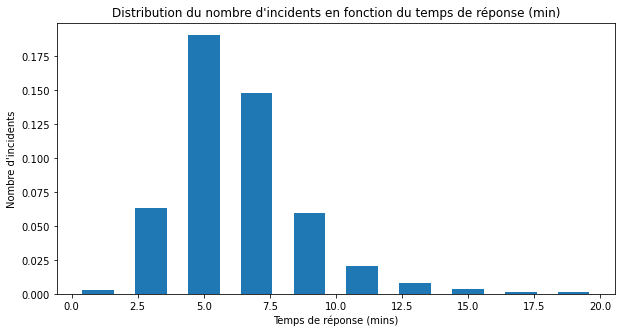

In [65]:
# Visualisation du temps de réponse
plt.figure(figsize=(10,5))
plt.hist(df['ResponseTimeMinute'], density = True, rwidth = 0.6, range = (0,20))
plt.xlabel('Temps de réponse (mins)')
plt.ylabel('Nombre d\'incidents')
plt.title('Distribution du nombre d\'incidents en fonction du temps de réponse (min)');
# Le temps de d'intervention des pompiers est majoritairement compris entre 3 et 8 min. La prédiction du temps de réponse doit donc être de l'ordre de la minute.

,df,sum_sq,mean_sq,F,PR(>F)
HourMobilised,1.0,2.367924e+03,2367.923900,387.246802,3.504934e-86
Residual,596536.0,3.647679e+06,6.114767,NaN,NaN


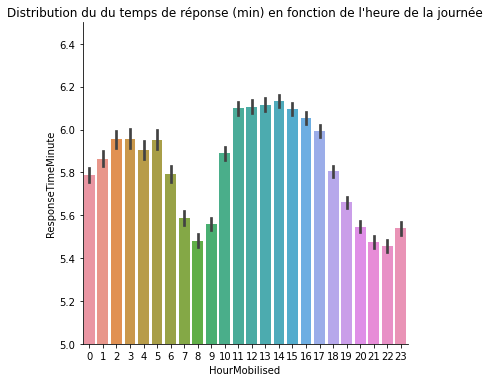

In [66]:
# Visualisation du temps de réponse en fonction de l'heure de la journée

sns.catplot(x = 'HourMobilised', y = 'ResponseTimeMinute', kind = 'bar', data = df)
plt.ylim(5,6.5)
plt.title('Distribution du du temps de réponse (min) en fonction de l\'heure de la journée');

# Relation avec la variable cible

# Hypothèse HourMobilised n'influe pas sur ResponseTimeMinute
result = statsmodels.formula.api.ols('ResponseTimeMinute ~ HourMobilised', data = df).fit()
table = statsmodels.api.stats.anova_lm(result)
table
# Conclusion : la p-value (PR(>F)) est inférieure à 5% donc on rejette l'hypothèse. Les 2 variables ne sont pas indépendantes.
# Le temps de réponse le plus faible est atteint à 8h, ce temps augmente jusqu'à 14h pour atteindre sa valeur maximale puis diminue jusqu'à 22h pour réaugmenter et 
# atteindre un second pic vers 5h du matin.
# Le temps de réponse maximum est atteint à 14h, ce temps de réponse diminue jusqu'à 22h.

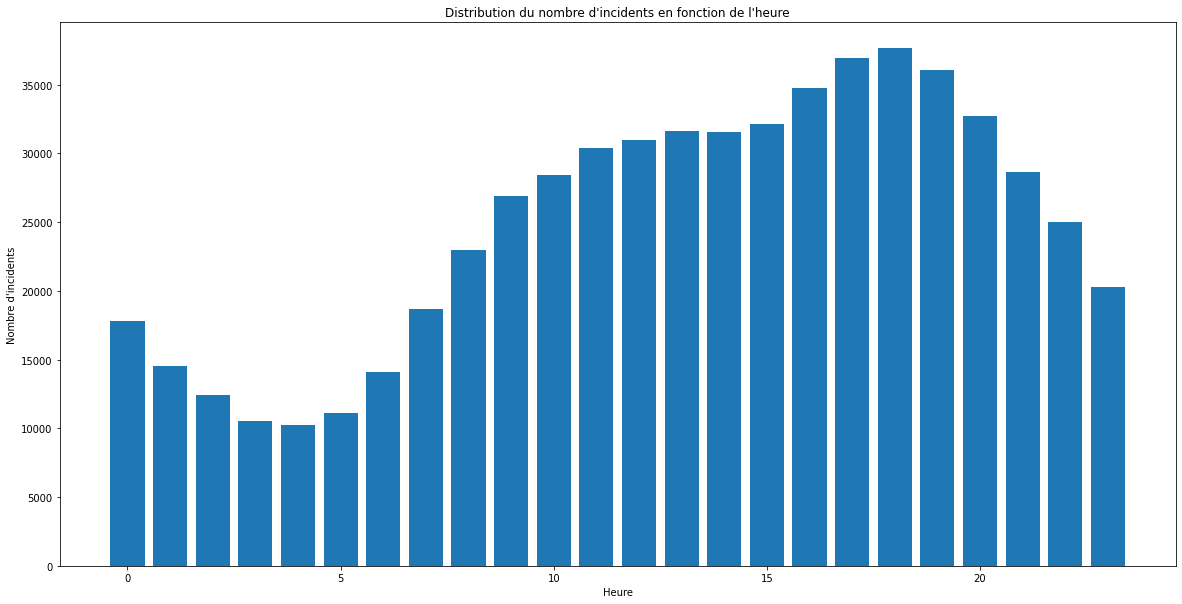

In [67]:
incident_per_hour = df.groupby('HourMobilised', as_index = False).agg({'IncidentNumber':'count'})
# incident_per_hour
plt.figure(figsize=(20,10))
plt.bar(incident_per_hour['HourMobilised'],incident_per_hour['IncidentNumber'])
plt.xlabel('Heure')
plt.ylabel('Nombre d\'incidents')
plt.title('Distribution du nombre d\'incidents en fonction de l\'heure');

,df,sum_sq,mean_sq,F,PR(>F)
WeekdayMobilised,1.0,2.211497e+00,2.211497,0.361431,0.547713
Residual,596536.0,3.650044e+06,6.118733,NaN,NaN


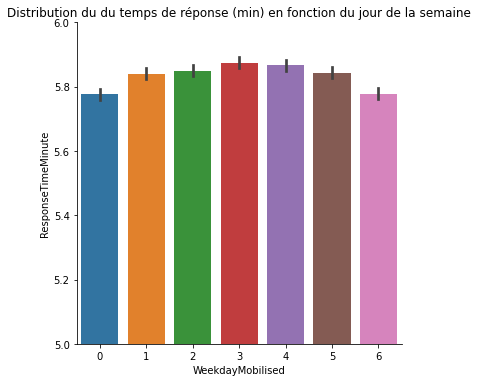

In [68]:
# Visualisation du temps de réponse en fonction du jour de la semaine
sns.catplot(x = 'WeekdayMobilised', y = 'ResponseTimeMinute', kind = 'bar', data = df)
plt.ylim(5,6)
plt.title('Distribution du du temps de réponse (min) en fonction du jour de la semaine');

# Relation avec la variable cible

# Hypothèse WeekdayMobilised n'influe pas sur ResponseTimeMinute
result = statsmodels.formula.api.ols('ResponseTimeMinute ~ WeekdayMobilised', data = df).fit()
table = statsmodels.api.stats.anova_lm(result)
table
# Conclusion : la p-value (PR(>F)) est supérieure à 5% donc on n'accepte pas l'hypothèse nulle. Les 2 variables sont indépendantes.

,df,sum_sq,mean_sq,F,PR(>F)
MonthMobilised,1.0,1.048974e+01,10.489737,1.714368,0.19042
Residual,596536.0,3.650036e+06,6.118719,NaN,NaN


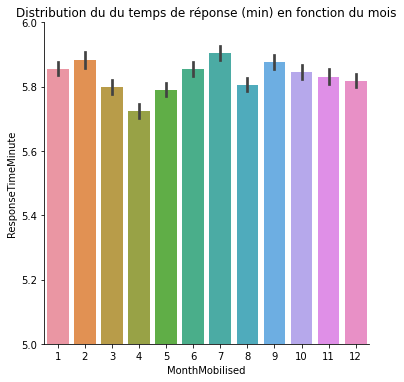

In [69]:
# Visualisation du temps de réponse en fonction du mois

sns.catplot(x = 'MonthMobilised', y = 'ResponseTimeMinute', kind = 'bar', data = df)
plt.ylim(5,6)
plt.title('Distribution du du temps de réponse (min) en fonction du mois');

# Relation avec la variable cible

# Hypothèse MonthMobilised n'influe pas sur ResponseTimeMinute
result = statsmodels.formula.api.ols('ResponseTimeMinute ~ MonthMobilised', data = df).fit()
table = statsmodels.api.stats.anova_lm(result)
table
# Conclusion : la p-value (PR(>F)) est supérieure à 5% donc on valide l'hypothèse. Les 2 variables sont indépendantes.

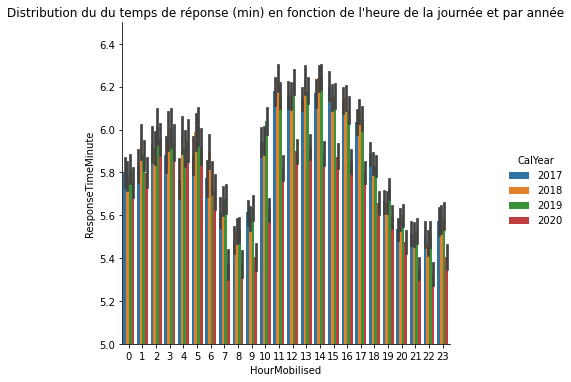

In [70]:
# Visualisation du temps de réponse en fonction de l'heure de la journée et par année
sns.catplot(x = 'HourMobilised', y = 'ResponseTimeMinute', kind = 'bar', hue = 'CalYear', data = df)
plt.ylim(5,6.5)
plt.title('Distribution du du temps de réponse (min) en fonction de l\'heure de la journée et par année');

# On observe qu'en majorité le temps de réponse le plus faible était en 2020 à chaque moment de la journée.

<Figure size 1440x720 with 0 Axes>

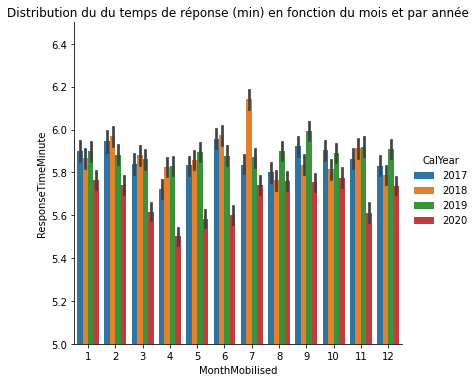

In [71]:
# Visualisation du temps de réponse en fonction du mois et par année
plt.figure(figsize=(20,10))
sns.catplot(x = 'MonthMobilised', y = 'ResponseTimeMinute', kind = 'bar', hue = 'CalYear', data = df)
plt.ylim(5,6.5)
plt.title('Distribution du du temps de réponse (min) en fonction du mois et par année');

# On observe que le temps de réponse moyen est systématiquement plus faible à chaque mois de l'année en 2020.
# On observe également que la différence est plus importante pour les mois d'avril, mai et novembre, mois de l'année pendant
# lesquels la ville de Londres était complètement confinée.

,df,sum_sq,mean_sq,F,PR(>F)
PropertyCategory,8.0,3.467587e+04,4334.483233,715.181162,0.0
Residual,596529.0,3.615371e+06,6.060679,NaN,NaN


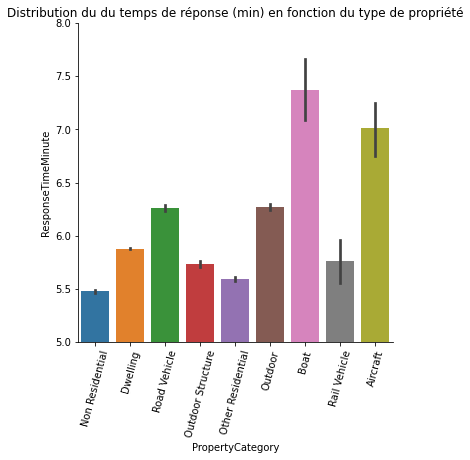

In [72]:
# Visualisation du temps de réponse en fonction du type de propriété
viz = sns.catplot(x = 'PropertyCategory', y = 'ResponseTimeMinute', kind = 'bar', data = df)
viz.set_xticklabels(rotation=75)
plt.ylim(5,8)
plt.title('Distribution du du temps de réponse (min) en fonction du type de propriété');

# Relation avec la variable cible

# Hypothèse PropertyCategory n'influe pas sur ResponseTimeMinute
result = statsmodels.formula.api.ols('ResponseTimeMinute ~ PropertyCategory', data = df).fit()
table = statsmodels.api.stats.anova_lm(result)
table
# Conclusion : la p-value (PR(>F)) est inférieure à 5% donc on rejette l'hypothèse. Les 2 variables ne sont pas indépendantes.
# On observe que lorsqu'un incident a lieu dans un bateau ou un avion, le temps de réponse est plus élevé.

,df,sum_sq,mean_sq,F,PR(>F)
AddressQualifier,10.0,5.024755e+04,5024.754579,832.658112,0.0
Residual,596527.0,3.599799e+06,6.034595,NaN,NaN


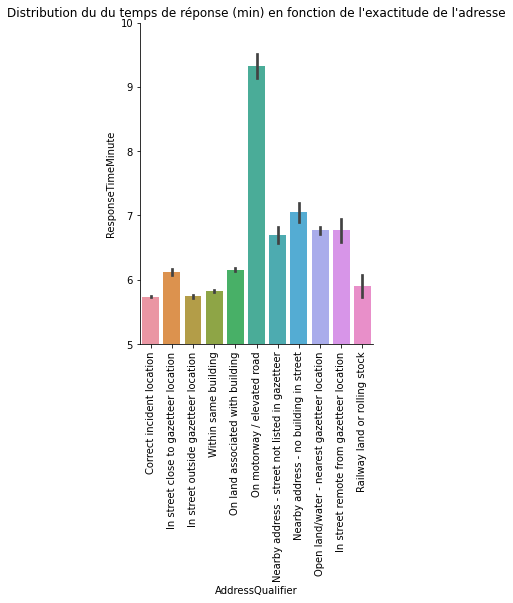

In [73]:
# Visualisation du temps de réponse en fonction de l'exactitude de l'adresse
viz = sns.catplot(x = 'AddressQualifier', y = 'ResponseTimeMinute', kind = 'bar', data = df)
viz.set_xticklabels(rotation=90)
plt.ylim(5,10)
plt.title('Distribution du du temps de réponse (min) en fonction de l\'exactitude de l\'adresse');


# Relation avec la variable cible

# Hypothèse AddressQualifier n'influe pas sur ResponseTimeMinute
result = statsmodels.formula.api.ols('ResponseTimeMinute ~ AddressQualifier', data = df).fit()
table = statsmodels.api.stats.anova_lm(result)
table
# Conclusion : la p-value (PR(>F)) est inférieure à 5% donc on rejette l'hypothèse. Les 2 variables ne sont pas indépendantes.
# On observe que le temps de réponse le plus faible est obtenue lorsque l'adresse est correcte.
# Par ailleurs, le temps de réponse le plus long est obtenu lorsque l'incident se trouve sur une autoroute ou une route
# surélevée. En effet, il est plus difficile d'indiquer une localisation précise sur ce types de lieu.

,df,sum_sq,mean_sq,F,PR(>F)
IncGeo_BoroughName,32.0,1.126235e+05,3519.485060,593.480188,0.0
Residual,596505.0,3.537423e+06,5.930249,NaN,NaN


<Figure size 1440x720 with 0 Axes>

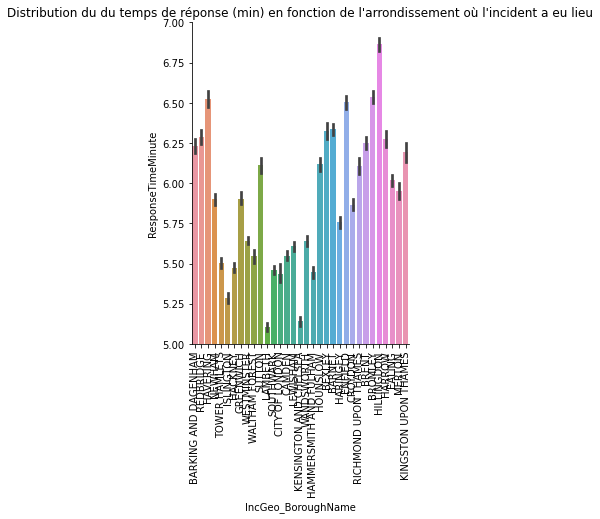

In [74]:
# Visualisation du temps de réponse en fonction de l'arrondissement où l'incident a eu lieu
plt.figure(figsize=(20,10))
viz = sns.catplot(x = 'IncGeo_BoroughName', y = 'ResponseTimeMinute', kind = 'bar', data = df)
viz.set_xticklabels(rotation=90)
plt.ylim(5,7)
plt.title('Distribution du du temps de réponse (min) en fonction de l\'arrondissement où l\'incident a eu lieu');

# Relation avec la variable cible

# Hypothèse IncGeo_BoroughName n'influe pas sur ResponseTimeMinute
result = statsmodels.formula.api.ols('ResponseTimeMinute ~ IncGeo_BoroughName', data = df).fit()
table = statsmodels.api.stats.anova_lm(result)
table
# Conclusion : la p-value (PR(>F)) est inférieure à 5% donc on rejette l'hypothèse. Les 2 variables ne sont pas indépendantes.
# On observe qu'il y a une différence de temps d'intervention en fonction des arrondissements.

,df,sum_sq,mean_sq,F,PR(>F)
CityCenter,1.0,7.320272e+04,73202.716413,12208.544368,0.0
Residual,596536.0,3.576844e+06,5.996023,NaN,NaN


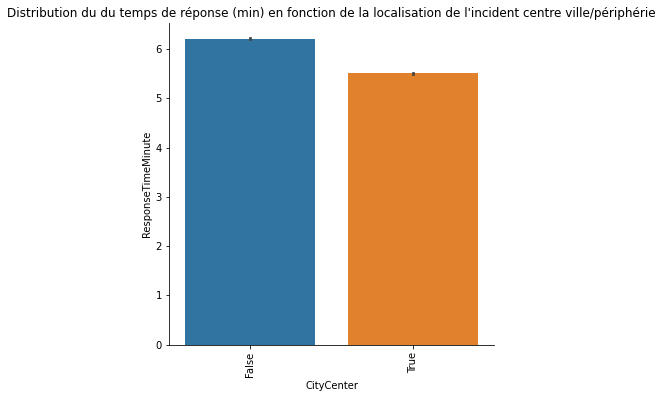

In [75]:
# Visualisation du temps de réponse en fonction de la localisation de l'incident centre ville/périphérie
viz = sns.catplot(x = 'CityCenter', y = 'ResponseTimeMinute', kind = 'bar', data = df)
viz.set_xticklabels(rotation=90)
plt.title('Distribution du du temps de réponse (min) en fonction de la localisation de l\'incident centre ville/périphérie');

# Relation avec la variable cible

# Hypothèse CityCenter n'influe pas sur ResponseTimeMinute
result = statsmodels.formula.api.ols('ResponseTimeMinute ~ CityCenter', data = df).fit()
table = statsmodels.api.stats.anova_lm(result)
table
# Conclusion : la p-value (PR(>F)) est inférieure à 5% donc on rejette l'hypothèse. Les 2 variables ne sont pas indépendantes.
# On observe que le temps de réponse est plus faible lorsque l'incident a lieu en centre ville.

,df,sum_sq,mean_sq,F,PR(>F)
IncidentStationGround,101.0,1.592665e+05,1576.895797,269.429017,0.0
Residual,596436.0,3.490780e+06,5.852732,NaN,NaN


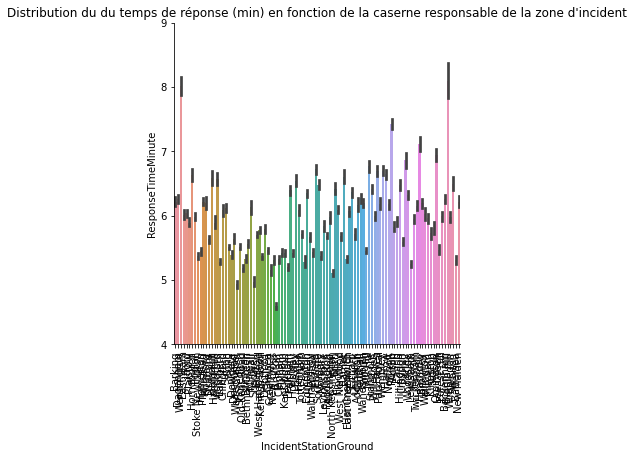

In [76]:
# Visualisation du temps de réponse en fonction de la caserne responsable de la zone d'incident
viz = sns.catplot(x = 'IncidentStationGround', y = 'ResponseTimeMinute', kind = 'bar', data = df)
viz.set_xticklabels(rotation=90)
plt.ylim(4,9)
plt.title('Distribution du du temps de réponse (min) en fonction de la caserne responsable de la zone d\'incident');

# Relation avec la variable cible

# Hypothèse 'IncidentStationGround' n'influe pas sur ResponseTimeMinute
result = statsmodels.formula.api.ols('ResponseTimeMinute ~ IncidentStationGround', data = df).fit()
table = statsmodels.api.stats.anova_lm(result)
table
# Conclusion : la p-value (PR(>F)) est inférieure à 5% donc on rejette l'hypothèse. Les 2 variables ne sont pas indépendantes.

,df,sum_sq,mean_sq,F,PR(>F)
FirstPumpArriving_DeployedFromStation,103.0,1.240437e+05,1204.308211,203.712368,0.0
Residual,596434.0,3.526003e+06,5.911807,NaN,NaN


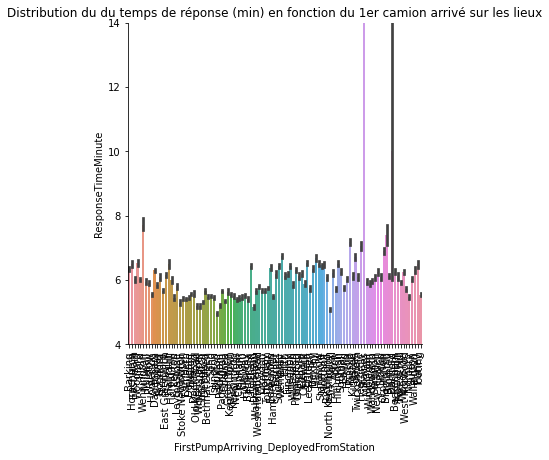

In [77]:
# Visualisation du temps de réponse en fonction du 1er camion arrivé sur les lieux
viz = sns.catplot(x = 'FirstPumpArriving_DeployedFromStation', y = 'ResponseTimeMinute', kind = 'bar', data = df)
viz.set_xticklabels(rotation=90)
plt.ylim(4,14)
plt.title('Distribution du du temps de réponse (min) en fonction du 1er camion arrivé sur les lieux');

# Relation avec la variable cible

# Hypothèse 'FirstPumpArriving_DeployedFromStation' n'influe pas sur ResponseTimeMinute
result = statsmodels.formula.api.ols('ResponseTimeMinute ~ FirstPumpArriving_DeployedFromStation', data = df).fit()
table = statsmodels.api.stats.anova_lm(result)
table
# Conclusion : la p-value (PR(>F)) est inférieure à 5% donc on rejette l'hypothèse. Les 2 variables ne sont pas indépendantes.

,df,sum_sq,mean_sq,F,PR(>F)
DeployedFromStation_Name,101.0,1.156207e+05,1144.759887,193.178769,0.0
Residual,596436.0,3.534426e+06,5.925909,NaN,NaN


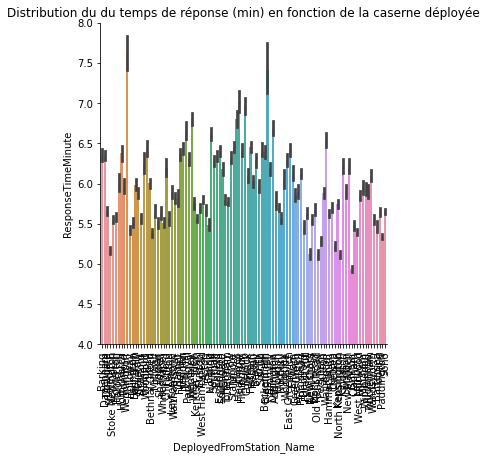

In [78]:
# Visualisation du temps de réponse en fonction de la caserne déployée
viz = sns.catplot(x = 'DeployedFromStation_Name', y = 'ResponseTimeMinute', kind = 'bar', data = df)
viz.set_xticklabels(rotation=90)
plt.ylim(4,8)
plt.title('Distribution du du temps de réponse (min) en fonction de la caserne déployée');

# Relation avec la variable cible

# Hypothèse 'DeployedFromStation_Name' n'influe pas sur ResponseTimeMinute
result = statsmodels.formula.api.ols('ResponseTimeMinute ~ DeployedFromStation_Name', data = df).fit()
table = statsmodels.api.stats.anova_lm(result)
table
# Conclusion : la p-value (PR(>F)) est inférieure à 5% donc on rejette l'hypothèse. Les 2 variables ne sont pas indépendantes.

,df,sum_sq,mean_sq,F,PR(>F)
DeployedFromLocation,1.0,7.787973e+03,7787.973492,1275.52906,4.648379e-279
Residual,596536.0,3.642258e+06,6.105681,NaN,NaN


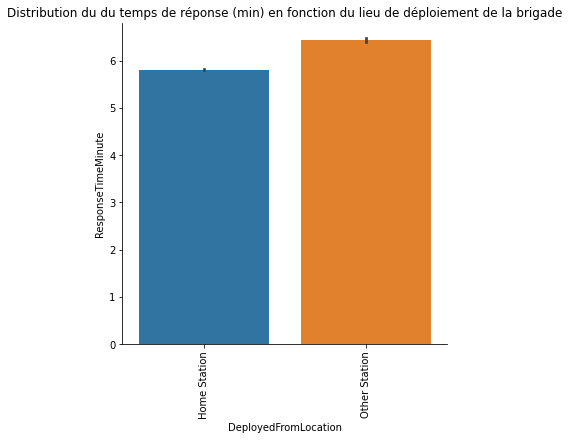

In [79]:
# Visualisation du temps de réponse en fonction du lieu de déploiement de la brigade
viz = sns.catplot(x = 'DeployedFromLocation', y = 'ResponseTimeMinute', kind = 'bar', data = df)
viz.set_xticklabels(rotation=90)
plt.title('Distribution du du temps de réponse (min) en fonction du lieu de déploiement de la brigade');

# Relation avec la variable cible

# Hypothèse 'DeployedFromLocation' n'influe pas sur ResponseTimeMinute
result = statsmodels.formula.api.ols('ResponseTimeMinute ~ DeployedFromLocation', data = df).fit()
table = statsmodels.api.stats.anova_lm(result)
table
# Conclusion : la p-value (PR(>F)) est inférieure à 5% donc on rejette l'hypothèse. Les 2 variables ne sont pas indépendantes.
# On observe que le temps de réponse est plus faible lorsque la brigade se trouve à leur caserne lors de l'appel (97% des cas).

,df,sum_sq,mean_sq,F,PR(>F)
IncidentGroup,2.0,9.187865e+03,4593.932619,752.691025,0.0
Residual,596535.0,3.640859e+06,6.103344,NaN,NaN


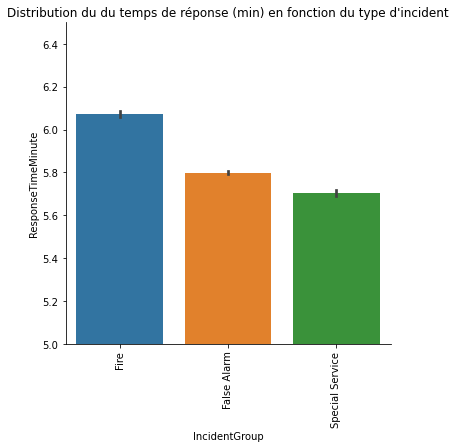

In [80]:
# Visualisation du temps de réponse en fonction du type d'incident
viz = sns.catplot(x = 'IncidentGroup', y = 'ResponseTimeMinute', kind = 'bar', data = df)
viz.set_xticklabels(rotation=90)
plt.ylim(5,6.5)
plt.title('Distribution du du temps de réponse (min) en fonction du type d\'incident');

# Relation avec la variable cible

# Hypothèse 'IncidentGroup' n'influe pas sur ResponseTimeMinute
result = statsmodels.formula.api.ols('ResponseTimeMinute ~ IncidentGroup', data = df).fit()
table = statsmodels.api.stats.anova_lm(result)
table
# Conclusion : la p-value (PR(>F)) est inférieure à 5% donc on rejette l'hypothèse. Les 2 variables ne sont pas indépendantes.
# On observe que le temps de réponse est plus long lorsqu'il s'agit d'un incendie.

,df,sum_sq,mean_sq,F,PR(>F)
PumpOrder,1.0,4.988734e+05,498873.353285,94439.722552,0.0
Residual,596536.0,3.151173e+06,5.282453,NaN,NaN


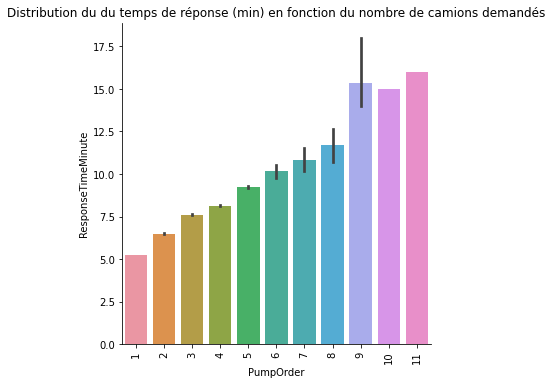

In [81]:
# Visualisation du temps de réponse en fonction du nombre de camions demandés
viz = sns.catplot(x = 'PumpOrder', y = 'ResponseTimeMinute', kind = 'bar', data = df)
viz.set_xticklabels(rotation=90)
plt.title('Distribution du du temps de réponse (min) en fonction du nombre de camions demandés');

# Relation avec la variable cible

# Hypothèse 'PumpOrder' n'influe pas sur ResponseTimeMinute
result = statsmodels.formula.api.ols('ResponseTimeMinute ~ PumpOrder', data = df).fit()
table = statsmodels.api.stats.anova_lm(result)
table
# Conclusion : la p-value (PR(>F)) est inférieure à 5% donc on rejette l'hypothèse. Les 2 variables ne sont pas indépendantes.
# On observe que plus le nombre de camions demandés est grand, plus le temps de réponse est important.
# Limites : pour la grande majorité des incidents, seuls 1 ou 2 camions interviennent (Ex : 1 seul incident avec 11 camions)